In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# reading data
data= pd.read_csv("sales_data_with_discounts.csv")
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
data.shape

(450, 13)

In [4]:
# detecting data types of  columns
data.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [5]:
data.describe

<bound method NDFrame.describe of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discou

In [6]:
data["Net Sales Value"], data["Discount Rate (%)"], data["Discount Amount"	]= data["Net Sales Value"].round(2),data["Discount Rate (%)"].round(2),data["Discount Amount"].round(2)
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.65,21153.50,160346.50
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.56,11676.10,89323.90
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.46,10657.91,102042.09
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.94,8364.07,112235.93
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,18.00,4372.95,19927.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.48,402.37,2197.63
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.06,2660.90,12939.10
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.97,606.90,2593.10
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.79,957.20,4742.80


In [7]:
# listing nummeric coulumns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


 #A brief interpretaion of the basic stats #
>Mean: The arithmetic average of all values, showing the central tendency of the dataset.
>
>Median: The middle value when data is ordered, representing the typical center and less affected by outliers.
>
>Mode: The most frequently occurring value, indicating the most common data point.
>
>Standard Deviation: A measure of how spread out the values are around the mean, showing the level of variability in the dataset.

In [8]:
# Calculating Mean, Median, mode and standard Deviation for all the numerical columns
for i in num_cols:
    print(f"The description for {i} \n Mean : {data[i].mean().round(2)} \n Median :{data[i].median()}\n Mode: {stats.mode(data[i]).mode}\n Standard deviation : {round(np.std(data[i]),2)}   ")
    print("\n-------------------------")

The description for Volume 
 Mean : 5.07 
 Median :4.0
 Mode: 3
 Standard deviation : 4.23   

-------------------------
The description for Avg Price 
 Mean : 10453.43 
 Median :1450.0
 Mode: 400
 Standard deviation : 18059.8   

-------------------------
The description for Total Sales Value 
 Mean : 33812.84 
 Median :5700.0
 Mode: 24300
 Standard deviation : 50478.89   

-------------------------
The description for Discount Rate (%) 
 Mean : 15.16 
 Median :16.58
 Mode: 17.51
 Standard deviation : 4.22   

-------------------------
The description for Discount Amount 
 Mean : 3346.5 
 Median :988.935
 Mode: 735.71
 Standard deviation : 4504.89   

-------------------------
The description for Net Sales Value 
 Mean : 30466.34 
 Median :4677.79
 Mode: 326.97
 Standard deviation : 46307.12   

-------------------------


# Visulaization  

# Histogra  

<Figure size 1000x2000 with 0 Axes>

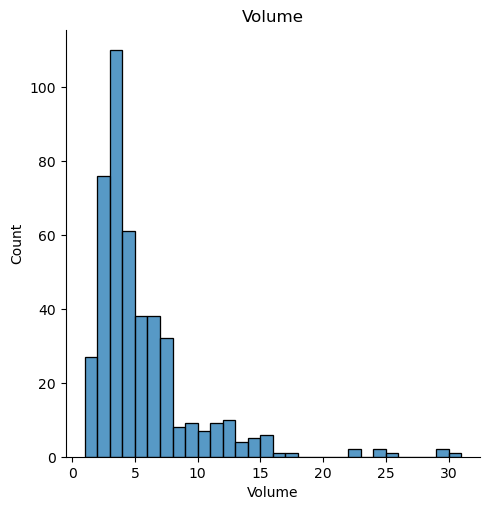

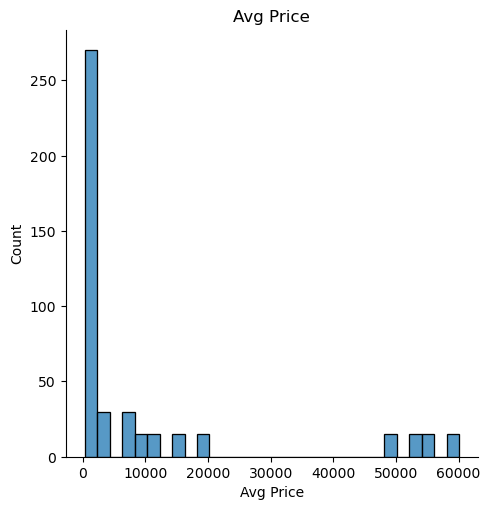

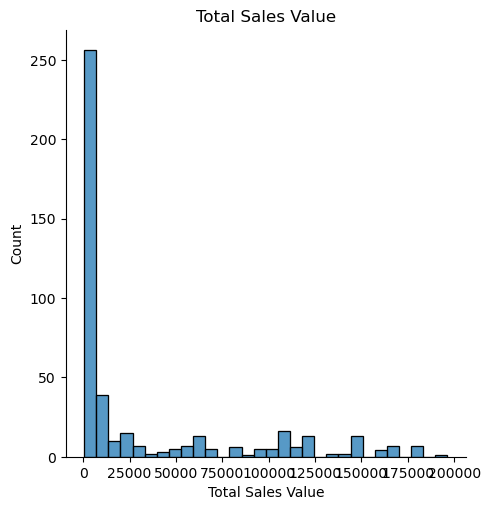

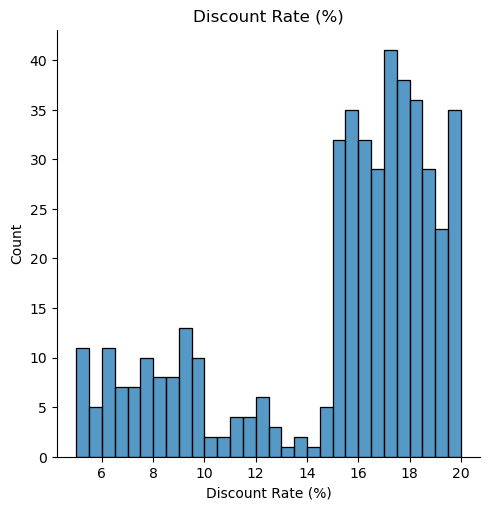

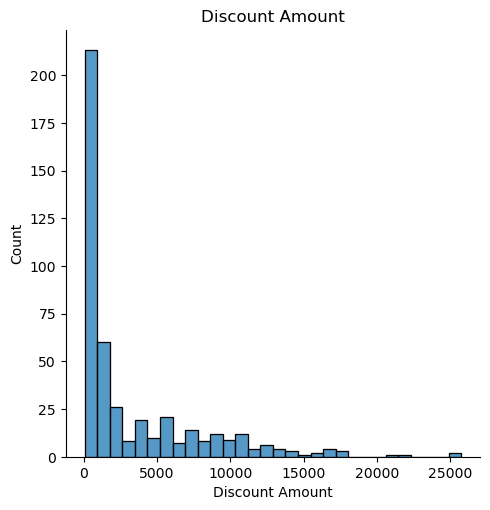

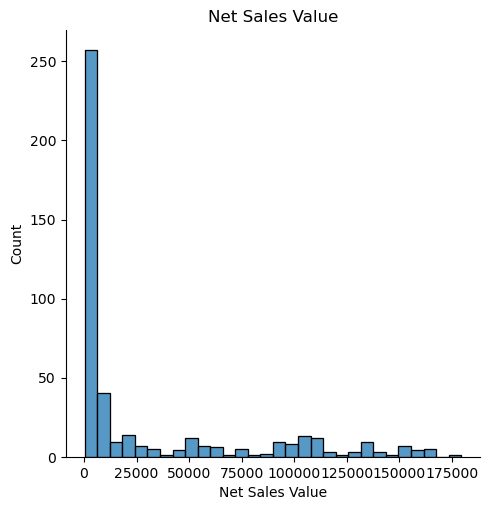

In [10]:
# Plotting Histogram for all columns
plt.figure(figsize=(10,20))
for i in num_cols:

    sns.displot(data[i], bins =30)

    plt.title(i)
    plt.show()

" As per the visulization of the above histplot we can see that all the the graphs are Positively Skewed "

In [11]:
# box plot for outliers

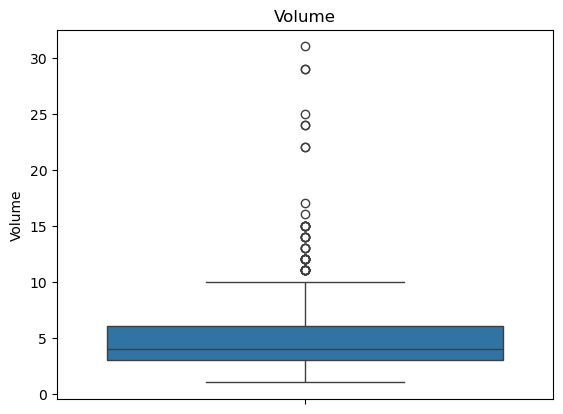

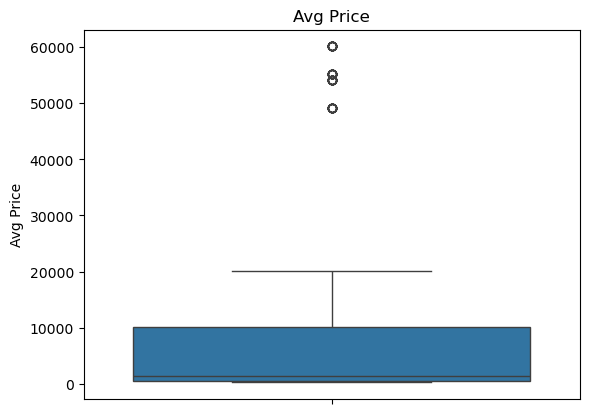

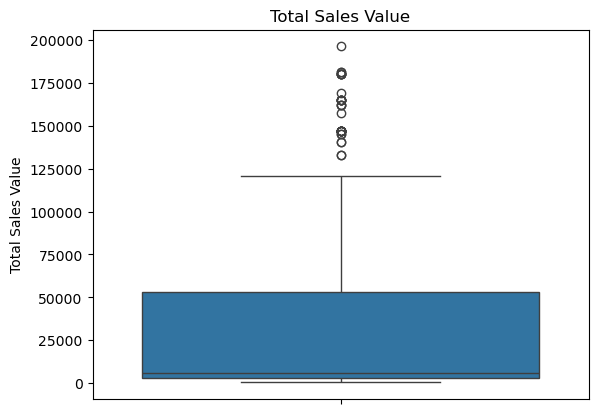

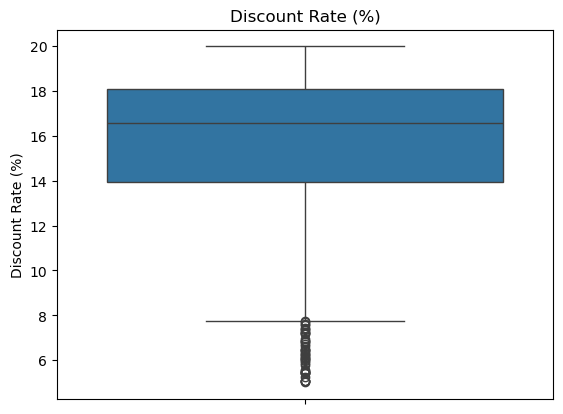

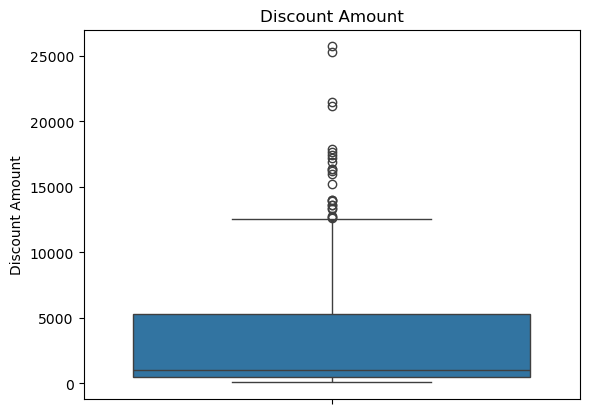

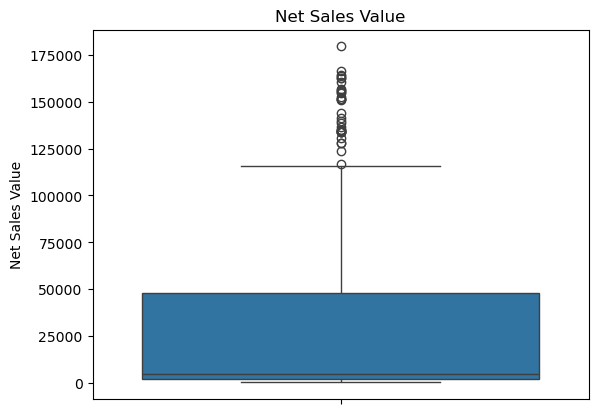

In [12]:
# plt.figure(figsize=(10,20))
for i in num_cols:

    sns.boxplot(data[i])

    plt.title(i)
    plt.show()

The box plot shows that every column contains outliers, which are extreme values lying far from the normal range of data. These values may result from natural variation or errors and can affect the overall statistical analysis.

# Bar plot #

In [13]:
# creating the list for Catogoriacal coulumns 
cat_cols = data.select_dtypes(include=["category","object"]).columns.tolist()
cat_cols
# cat_cols.remove("Date")
# cat_cols.append("Day")


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

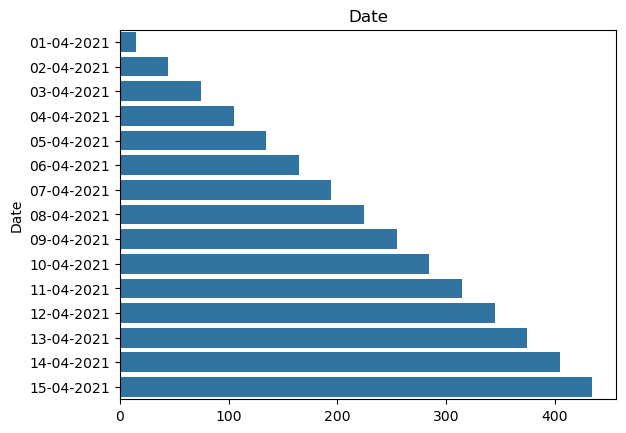

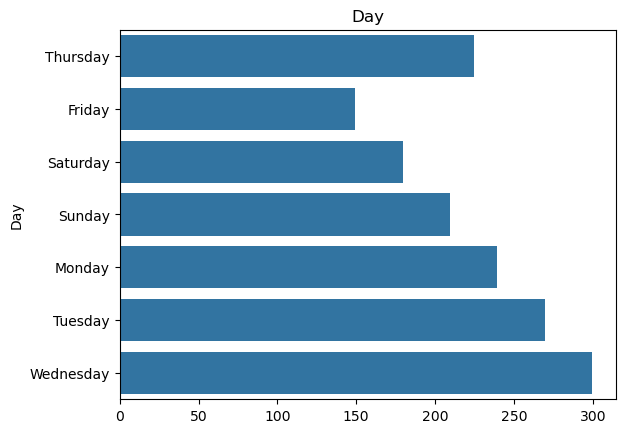

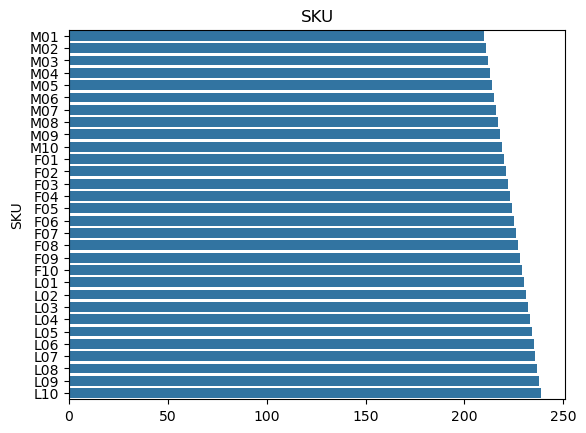

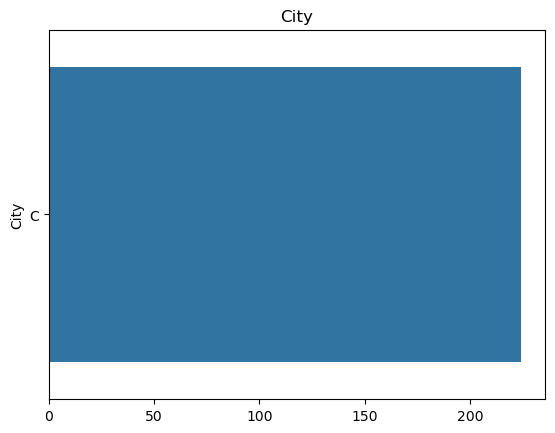

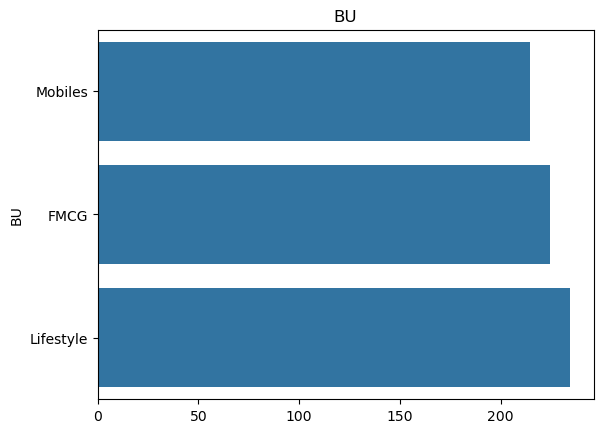

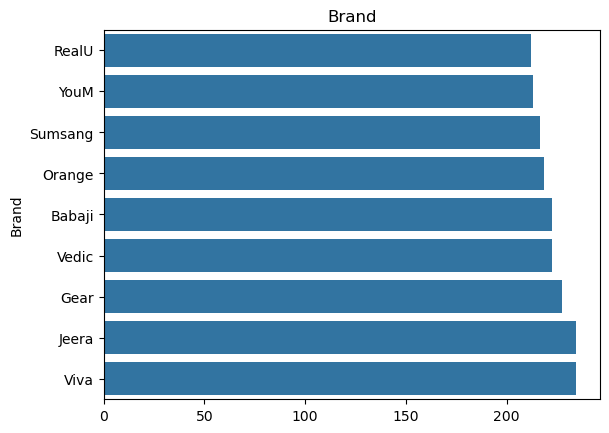

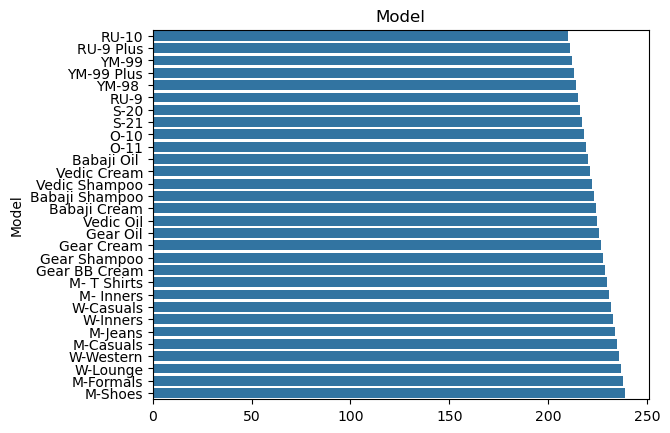

In [14]:
# Bar plot for catogoriacal data 
for i in cat_cols:

    sns.barplot( data[i] ,errorbar=None)

    plt.title(i)
    plt.show()

# Starnardization #

Standardization is an essential step when preparing data for machine learning and analysis.
> In datasets, different features can have different units and scales. Standardizaion Ensures fair comparison between features with different scales/units.
> 
> Standardization makes the features comparable by putting them on the same scale.
> 
> Helps algorithms that use distance measures (KNN, k-means) because distance won’t be dominated by one feature.
> 
> Improves convergence speed for optimization-based models (like logistic regression, neural networks).


In [15]:


from scipy.stats import zscore

for i in  num_cols:
    data[f"{i}.zsc"] = zscore(data[[i]])


zcr= data.iloc[:,-6:]


In [16]:
# data
z_score=zcr.columns.tolist()
z_score

['Volume.zsc',
 'Avg Price.zsc',
 'Total Sales Value.zsc',
 'Discount Rate (%).zsc',
 'Discount Amount.zsc',
 'Net Sales Value.zsc']

In [17]:
# Dispaying the  standadize data for the numerial Coulumns 
zcr

,Volume.zsc,Avg Price.zsc,Total Sales Value.zsc,Discount Rate (%).zsc,Discount Amount.zsc,Net Sales Value.zsc
0,2.350029,0.091173,2.925721,-0.831450,3.952817,2.804756
1,1.167129,-0.019570,1.330995,-0.852797,1.849013,1.271026
2,0.457388,0.312659,1.562775,-1.350911,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.948648,1.113806,1.765810
4,-0.488932,-0.130313,-0.188452,0.674752,0.227853,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.077015,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451787,-0.152190,-0.378500
447,-0.725512,-0.490229,-0.606448,0.904833,-0.608139,-0.601921
448,-0.488932,-0.473617,-0.556923,0.387743,-0.530379,-0.555499


<Figure size 1000x2000 with 0 Axes>

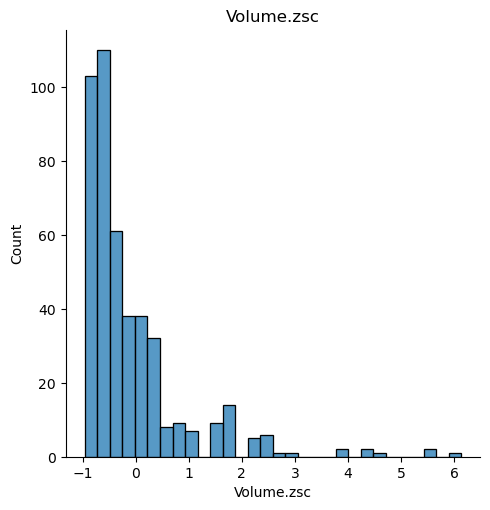

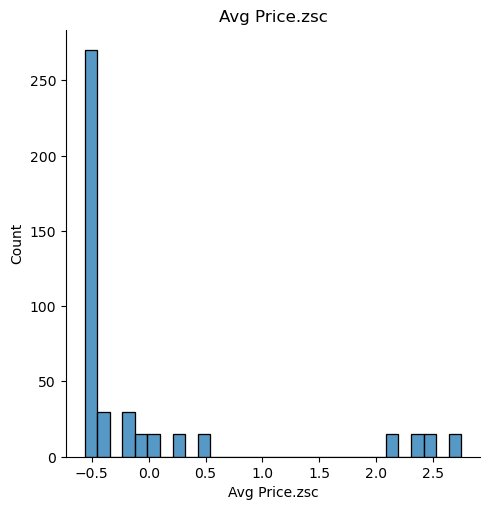

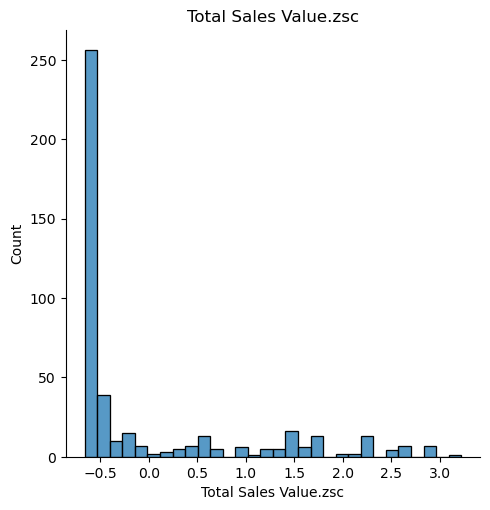

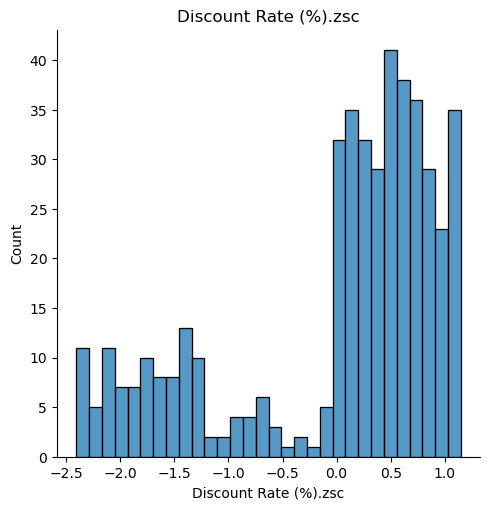

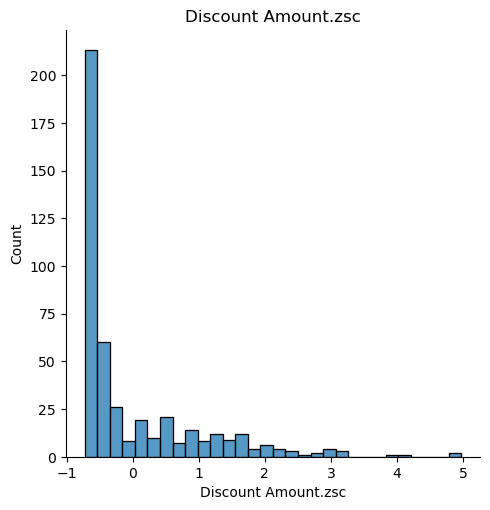

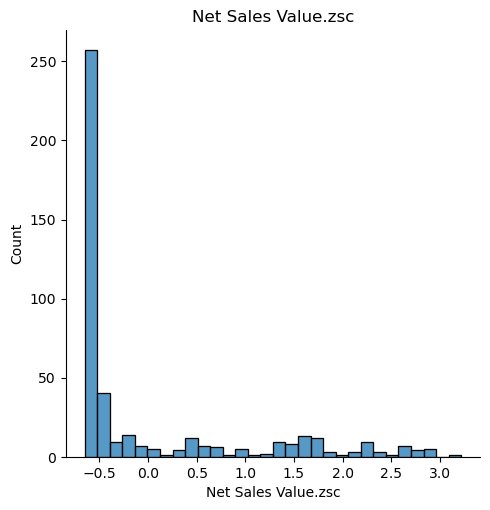

In [23]:

plt.figure(figsize=(10,20))
for i in z_score:

    sns.displot(zcr[i], bins =30)

    plt.title(i)
    plt.show()

In [ ]:
# droppint standardized colmuns 

data= data.drop(data.columns[-6:], axis=1)

# Dummy data ( One-hot Encoding) #
>Dummy variables are needed in machine learning because algorithms only understand numbers, not text. They change categories into numbers using 0 for False and 1 for True, so the model can read and use them without getting confused. This way, each category is treated fairly and separately.

In [24]:
# Reviewing which data is useful for dummy
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume.zsc,Avg Price.zsc,Total Sales Value.zsc,Discount Rate (%).zsc,Discount Amount.zsc,Net Sales Value.zsc
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.65,21153.50,160346.50,2.350029,0.091173,2.925721,-0.831450,3.952817,2.804756
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.56,11676.10,89323.90,1.167129,-0.019570,1.330995,-0.852797,1.849013,1.271026
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.46,10657.91,102042.09,0.457388,0.312659,1.562775,-1.350911,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.94,8364.07,112235.93,0.220808,0.534146,1.719276,-1.948648,1.113806,1.765810
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,18.00,4372.95,19927.05,-0.488932,-0.130313,-0.188452,0.674752,0.227853,-0.227595


In [25]:
# Selecting  columns which are required for further analysis 
dummy=  data[["BU",'SKU',"Brand", "Model"]]

dummy= pd.get_dummies(dummy, drop_first=True).astype(int)
dummy.head()

,BU_Lifestyle,BU_Mobiles,SKU_F02,SKU_F03,SKU_F04,SKU_F05,SKU_F06,SKU_F07,SKU_F08,SKU_F09,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
data2= data.drop(["BU",'SKU',"Brand", "Model"], axis=1)

In [27]:
data2= pd.concat([data2,dummy], axis=1)

data2

,Date,Day,City,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume.zsc,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,Thursday,C,15,12100,181500,11.65,21153.50,160346.50,2.350029,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,Thursday,C,10,10100,101000,11.56,11676.10,89323.90,1.167129,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,Thursday,C,7,16100,112700,9.46,10657.91,102042.09,0.457388,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,Thursday,C,6,20100,120600,6.94,8364.07,112235.93,0.220808,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,Thursday,C,3,8100,24300,18.00,4372.95,19927.05,-0.488932,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,C,2,1300,2600,15.48,402.37,2197.63,-0.725512,...,0,0,0,0,0,0,0,0,0,0
446,15-04-2021,Thursday,C,6,2600,15600,17.06,2660.90,12939.10,0.220808,...,0,0,0,0,0,0,1,0,0,0
447,15-04-2021,Thursday,C,2,1600,3200,18.97,606.90,2593.10,-0.725512,...,0,0,0,0,0,1,0,0,0,0
448,15-04-2021,Thursday,C,3,1900,5700,16.79,957.20,4742.80,-0.488932,...,0,0,0,0,0,0,0,0,0,0


As per the above table and interpretation, the categorical data has been converted into 0 and 1 using the get_dummies method, making it suitable for use in machine learning models.